# Application of anova on O3 levels in Occitania:

The purpose of this data analysis is to find out if there is a significant difference in ozone levels $ O3 $ between Toulouse, Montpellier, Perpignan and Albi.

To do so, we will proceed to $ Anova $ to test the following hypotheses:

$ H_0 $: _on average the ozone level in each city is the same_ against $ H_1 $: _on average the ozone level differs from one city to another_.

Before carrying out this test, we are going to clean the data set and we will keep, for our study, only the variables that we need to establish a result regarding the problem mentioned above.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from download import download

Data recovery:

In [2]:
url="http://josephsalmon.eu/enseignement/datasets/Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv"
path_target="./Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv"
download(url,path_target,replace=False)




Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv'

In [3]:
df_poccitanie=pd.read_csv("Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv")

In [4]:
print(df_poccitanie.shape)

(20808, 24)


The data table made up of 20,808 individuals and 24 variables.

In [5]:
df_poccitanie['day'] = pd.to_datetime(df_poccitanie['date_debut'])
df_poccitanie.columns

Index(['X', 'Y', 'id', 'nom_dep', 'nom_com', 'code_insee', 'nom_station',
       'code_station', 'typologie', 'influence', 'polluant', 'id_poll_ue',
       'valeur_originale', 'code_unite_concentration', 'metrique',
       'date_debut', 'date_fin', 'statut_valid', 'x_l93', 'y_l93', 'x_wgs84',
       'y_wgs84', 'geom', 'FID', 'day'],
      dtype='object')

Histogramme of pollutants:

Text(0.5, 1.0, 'Taux des polluants dans les villes')

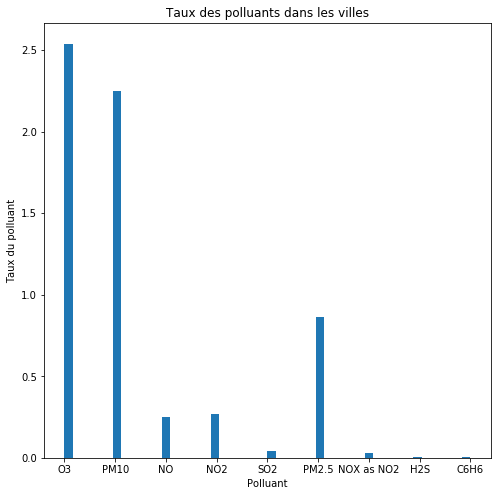

In [6]:
plt.figure(figsize=(8,8))
plt.hist(df_poccitanie['polluant'],density=True,bins=50)
plt.xlabel("Polluant")
plt.ylabel("Taux du polluant")
plt.title("Taux des polluants dans les villes")


The pollutant "O3" stands out from the rest. Indeed, it is the pollutant that is found the most in the towns of the Occitanie region.

We are therefore going to base our study on this pollutant. For that we will create a new table which contains only the modality "O3" for the variable $ pollutant $

In [7]:
df_poccitanieO3=df_poccitanie.loc[df_poccitanie['polluant']=="O3",:]
df_poccitanieO3.head(3)

,X,Y,id,nom_dep,nom_com,code_insee,nom_station,code_station,typologie,influence,...,date_debut,date_fin,statut_valid,x_l93,y_l93,x_wgs84,y_wgs84,geom,FID,day
0,1.41861,43.5756,12001,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,2017-12-15T01:00:00.000Z,2017-12-16T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12001,2017-12-15 01:00:00+00:00
1,1.41861,43.5756,12002,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,2017-12-16T01:00:00.000Z,2017-12-17T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12002,2017-12-16 01:00:00+00:00
2,1.41861,43.5756,12003,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,2017-12-17T01:00:00.000Z,2017-12-18T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12003,2017-12-17 01:00:00+00:00


New table containing only the "O3" modality for the _polluant_ variable and the cities of Montpellier, Toulouse, Perpignan and Albi for the _name_com_ variable. We will then create a new table containing only the variables that we will use for our study.

In [8]:
df_poccitanieO3_ville=df_poccitanieO3.loc[df_poccitanieO3['nom_com'].isin(["MONTPELLIER","TOULOUSE","PERPIGNAN","ALBI"]),:]


In [9]:
df_poccitanieO3_ville.head(3)

,X,Y,id,nom_dep,nom_com,code_insee,nom_station,code_station,typologie,influence,...,date_debut,date_fin,statut_valid,x_l93,y_l93,x_wgs84,y_wgs84,geom,FID,day
0,1.41861,43.5756,12001,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,2017-12-15T01:00:00.000Z,2017-12-16T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12001,2017-12-15 01:00:00+00:00
1,1.41861,43.5756,12002,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,2017-12-16T01:00:00.000Z,2017-12-17T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12002,2017-12-16 01:00:00+00:00
2,1.41861,43.5756,12003,HAUTE-GARONNE,TOULOUSE,31555,Toulouse-Jacquier Urbain\n,FR12004,urban,Fond,...,2017-12-17T01:00:00.000Z,2017-12-18T00:00:00.000Z,t,572227,6276450,1.41861,43.5756,0101000020E610000000000080A1B2F63F000000E0ABC9...,12003,2017-12-17 01:00:00+00:00


Text(0.5, 1.0, 'Taux de O3 par ville')

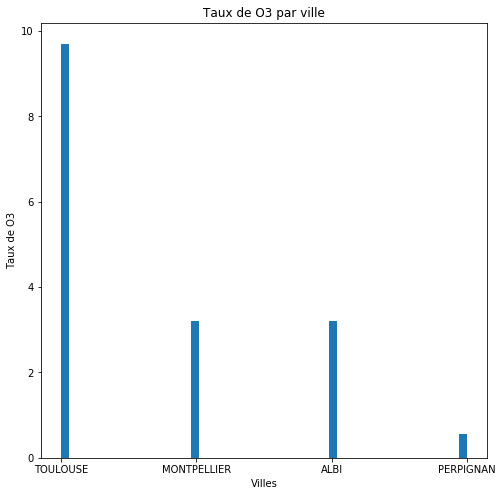

In [10]:
plt.figure(figsize=(8,8))
plt.hist(df_poccitanieO3_ville['nom_com'],density=True,bins=50)
plt.xlabel("Villes")
plt.ylabel("Taux de O3")
plt.title("Taux de O3 par ville")

The city with the highest O3 rate is Toulouse.

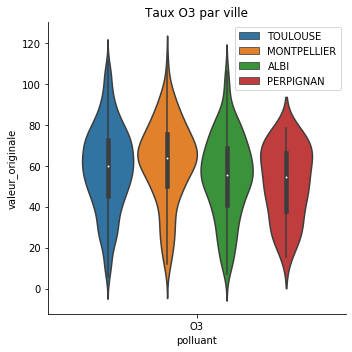

In [11]:
sns.catplot(x="polluant", y=df_poccitanieO3_ville.columns[12],hue="nom_com", data=df_poccitanieO3_ville, 
            kind="violin", legend=False)
plt.title("Taux O3 par ville")
plt.legend(loc=1)
plt.tight_layout()



The representation of the data in violin shows that we have as many o3 evaluation in each city.

The new array that we will use to execute the anova is df_poccitanieO3_ville which also contains 'day':

In [12]:
df_poccitanieO3_ville = df_poccitanieO3_ville[['day','polluant','valeur_originale','nom_com']]

In [13]:
df_poccitanieO3_ville.head(2)

,day,polluant,valeur_originale,nom_com
0,2017-12-15 01:00:00+00:00,O3,66.2,TOULOUSE
1,2017-12-16 01:00:00+00:00,O3,46.0,TOULOUSE


In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


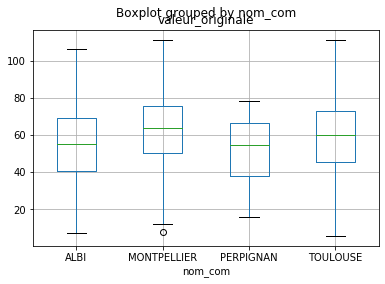

In [16]:
df_poccitanieO3_ville.boxplot('valeur_originale', by='nom_com')

The boxplot gives a prognosis as to the result of our problem.

Anova:

In [17]:
model1 = ols ('valeur_originale ~ nom_com',data = df_poccitanieO3_ville).fit()
aov_table = sm.stats.anova_lm(model1, typ=2)
print(aov_table)


                 sum_sq      df         F    PR(>F)
nom_com    11276.475405     3.0  8.758921  0.000009
Residual  795201.028359  1853.0       NaN       NaN


We obtain F = 8.76 > 0.0009, we therefore reject the hypothesis $ H_0 $ that is to say that there is a significant difference in the ozone levels between Toulouse, Montpellier, Perpignan and Albi.